# Data Extraction

Notes:
1. The code assumes that the order of the columns remain the same i.e., columns 14:24 are items from the Updated Dogmatism Scale and they remain in the same order
2. The code assumes that other than the demo questionnaires, everything else requires an answer and the answer format has not changed - please notify if else
3. Code has not yet accounted for 'other' answers under the sex, gender, diagnoses, and stimulants section - need to discusss to streamline the output
4. Readability and flexibility is prioritised (or attempting to), if there are any parts that are unreadable or is difficult to troubleshoot due to foreseeable issues, please lmk
5. Because of the way Jupyter works, if you've run a column and go back and run previous columns, the output may not be correct and/or an error may pop up - I've tried reducing the occurence as much as possible but the safest option is to re-run the code from the respective header/section 

---

# Setting Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, date, timedelta
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
os.chdir('/home/pavgreen/Documents/Amodio')
dforig = pd.read_csv('EEGmanylabs - Amodio et al (2007).csv')
dforig

,Timestamp,Please enter your Participant Number,When is your date of birth?,Which sex were you assigned at birth?,What is your gender?,Do you have a diagnosis of any psychiatric or neurological conditions?,"If you responded 'yes' to the previous question, please write below the diagnosis you have received.","Have you consumed any food, drinks, or medications containing nicotine, caffeine, alcohol or other stimulants in the last 24 hours?","If you responded 'yes' to the previous question, please write below what you have consumed",Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing ],...,Upset,Hostile,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Afraid,Active
0,2023/01/03 3:35:36 pm GMT+8,Test_aleya,1995-09-14,Female,Female,No,NaN,Yes,Tea/Coffee,Always Right,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/02/01 7:22:11 pm GMT+8,Test-Nick,1998-07-16,Male,Male,No,NaN,Yes,Chinese tea,Always Right,...,3.0,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0
2,2023/02/04 2:40:46 am GMT+8,Test-WZ,2001-03-20,Male,Male,No,NaN,Yes,Coffee,Always Right,...,3.0,3.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0,4.0
3,2023/02/04 6:11:49 pm GMT+8,Test-pav,1999-09-15,Male,Male,No,NaN,No,NaN,Always Right,...,4.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,3.0


---

## Functions

### All of these functions assumes numpy array | Tried class methods but too messy, may reconsider

#### Sum Whole Array

In [3]:
def swa(na):
    return np.round(np.sum(na),3)

#### Sum Columns

In [4]:
def sc(na):
    return np.round(np.sum(na, axis=0),3)

#### Sum Rows

In [5]:
def sr(na):
    return np.round(np.sum(na, axis=1),3)

#### Mean Whole Array

In [6]:
def mwa(na):
    return np.round(np.mean(na), 3)

#### Mean Columns

In [7]:
def mc(na):
    return np.round(np.mean(na, axis=0), 3)

#### Mean Rows

In [8]:
def mr(na):
    return np.round(np.mean(na, axis=1), 3)

#### SD Whole Array

In [9]:
def sdwa(na):
    return np.round(np.std(na), 3)

#### SD Columns

In [10]:
def sdc(na):
    return np.round(np.std(na, axis=0), 3)

#### SD Rows

In [11]:
def sdr(na):
    return np.round(np.std(na, axis=1), 3)

---

## Age, Sex, and Gender

### Sex and Gender

In [12]:
dfasg = dforig.iloc[:, 2:5]
dfasg

,When is your date of birth?,Which sex were you assigned at birth?,What is your gender?
0,1995-09-14,Female,Female
1,1998-07-16,Male,Male
2,2001-03-20,Male,Male
3,1999-09-15,Male,Male


#### Count

In [13]:
dfc = dfasg.groupby(dfasg.columns[1:3].tolist()).size()
dfc

Which sex were you assigned at birth?  What is your gender?
Female                                 Female                  1
Male                                   Male                    3
dtype: int64

<AxesSubplot:title={'center':'Sex and Gender'}, xlabel='Sex and Gender', ylabel='Number'>

(array([0, 1]), [Text(0, 0, '(Female, Female)'), Text(1, 0, '(Male, Male)')])

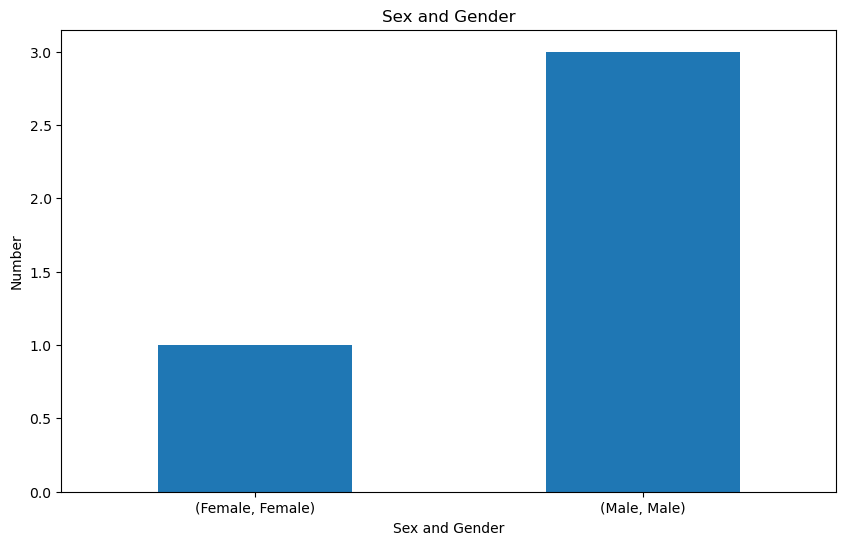

In [14]:
dfc.plot(kind='bar', title='Sex and Gender', ylabel='Number', xlabel='Sex and Gender', figsize=(10, 6))
plt.xticks(rotation=0)

### Age

In [15]:
def ymd(dt):
    bday = datetime.strptime(dt, "%Y-%m-%d").date()
    today = date.today()
    year = timedelta(days=365)
    age = (today-bday)//year
    return(age)

In [16]:
dfasg['Age'] = dfasg.iloc[:, 0].apply(ymd)
dfasg

,When is your date of birth?,Which sex were you assigned at birth?,What is your gender?,Age
0,1995-09-14,Female,Female,27
1,1998-07-16,Male,Male,24
2,2001-03-20,Male,Male,21
3,1999-09-15,Male,Male,23


#### Mean, Standard Deviation

In [17]:
age = np.array(dfasg['Age'])
print(f'Mean: {mwa(age)} | SD: {sdwa(age)}')

Mean: 23.75 | SD: 2.165


<BarContainer object of 2 artists>

Text(0, 0.5, 'Years')

Text(0.5, 1.0, 'Age')

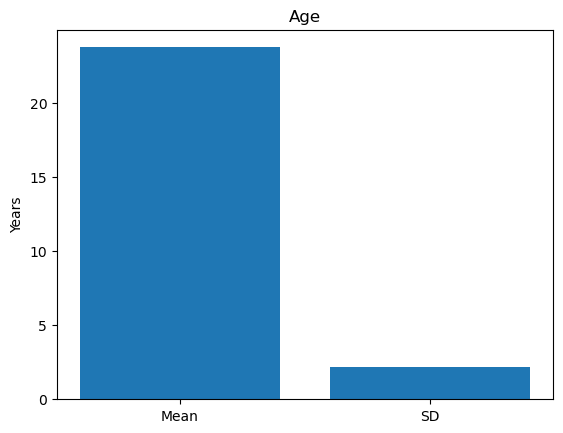

In [18]:
plt.bar(['Mean', 'SD'] , [mwa(age), sdwa(age)])
plt.ylabel('Years')
plt.title('Age')

---

## Diagnoses and Stimulants

In [19]:
dfdns = dforig.iloc[:, 5:9]
dfdns

,Do you have a diagnosis of any psychiatric or neurological conditions?,"If you responded 'yes' to the previous question, please write below the diagnosis you have received.","Have you consumed any food, drinks, or medications containing nicotine, caffeine, alcohol or other stimulants in the last 24 hours?","If you responded 'yes' to the previous question, please write below what you have consumed"
0,No,NaN,Yes,Tea/Coffee
1,No,NaN,Yes,Chinese tea
2,No,NaN,Yes,Coffee
3,No,NaN,No,NaN


### Diagnoses

#### Count in total, Responses if Yes, and Index if Yes

In [20]:
dfdns.iloc[:, 0].value_counts()

# Responses if yes
dfdns.iloc[:, 1].value_counts()

# Take note of index if yes (can and will update this to only take note if certain conditions are met i.e., bipolar but need to discuss parameters)
dfdns.index[dfdns.iloc[:, 0] == 'Yes'].tolist()

No    4
Name: Do you have a diagnosis of any  psychiatric or neurological conditions?, dtype: int64

Series([], Name: If you responded 'yes' to the previous question, please write below the diagnosis you have received., dtype: int64)

[]

### Stimulants

#### Count in total, Responses if Yes, and Index if Yes

In [21]:
dfdns.iloc[:, 2].value_counts()

# Should probably consider the categorisation of common responses i.e., Coffee, Tea)
dfdns.iloc[:, 3].value_counts()

# Take note of index if yes (can and will update this to only take note if certain conditions are met i.e., alcohol or narcotics but need to address categorisation first)
ind = dfdns.index[dfdns.iloc[:, 2] == 'Yes'].tolist()
print(f'Index of people who need to be removed: {ind}')

Yes    3
No     1
Name: Have you consumed any food, drinks, or medications containing nicotine, caffeine, alcohol or other stimulants in the last 24 hours?, dtype: int64

Tea/Coffee     1
Chinese tea    1
Coffee         1
Name: If you responded 'yes' to the previous question, please write below what you have consumed, dtype: int64

Index of people who need to be removed: [0, 1, 2]


---

## Edinburgh Handedness Inventory - Short Form

#### The scoring is based on the laterality quotient scores from [Veale's (2014)](https://www.tandfonline.com/doi/full/10.1080/1357650X.2013.783045#) and [Milenkovic and Dragovic's (2012)](https://www.tandfonline.com/doi/full/10.1080/1357650X.2012.683196?src=recsys) paper

In [22]:
dfehi = dforig.iloc[:, 9:13]
dfehi

,Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing ],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Throwing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Toothbrush],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Spoon]
0,Always Right,Always Right,Always Right,Always Right
1,Always Right,Always Right,Usually Right,Always Right
2,Always Right,Always Right,Usually Right,Always Right
3,Always Right,Always Right,Always Right,Always Right


In [23]:
scoring = {'Always Right': 100, 'Usually Right': 50, 'Both Equally': 0, 'Usually Left': -50, 'Always Left': 100}
dfehi.replace(scoring, inplace=True)

def handedness(n):
    if n > 60:
        return 'Right'
    elif n < 60 and n > -60:
        return 'Mixed'
    elif n < -60:
        return 'Left'

dfehi

,Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing ],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Throwing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Toothbrush],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Spoon]
0,100,100,100,100
1,100,100,50,100
2,100,100,50,100
3,100,100,100,100


### Count

In [24]:
hand = np.array(dfehi.iloc[:, :4])

dfehi['Handedness'] = mr(hand)
dfehi['Handedness'] = dfehi['Handedness'].apply(handedness)

dfehi
dfehi['Handedness'].value_counts()

,Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing ],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Throwing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Toothbrush],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Spoon],Handedness
0,100,100,100,100,Right
1,100,100,50,100,Right
2,100,100,50,100,Right
3,100,100,100,100,Right


Right    4
Name: Handedness, dtype: int64

<AxesSubplot:>

(array([0]), [Text(0, 0, 'Right')])

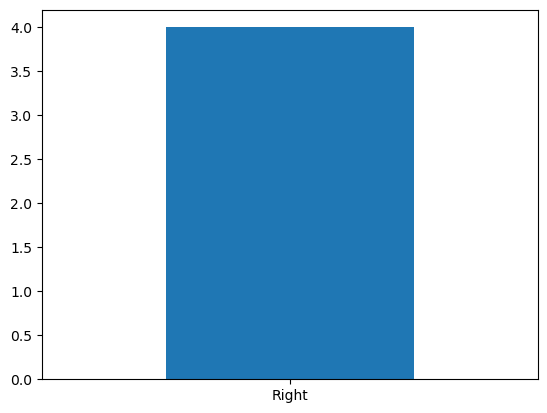

In [25]:
dfehi['Handedness'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

---

## One-Item liberalism vs Conservatism Scale

In [26]:
dfolc = dforig.iloc[:, 13]
dfolc

0   -4
1   -3
2    0
3   -4
Name: Instructions: Please indicate your political orientation on the scale below. [Political Orientation], dtype: int64

### Descriptive Statistics

In [27]:
olc = np.array(dfolc)
dfolc.value_counts()
print(f'Mean: {mwa(olc)} | SD: {sdwa(olc)}')

-4    2
-3    1
 0    1
Name: Instructions: Please indicate your political orientation on the scale below. [Political Orientation], dtype: int64

Mean: -2.75 | SD: 1.639


---

## Updated Dogmatism Scale

### Original Scores

In [28]:
dfuds = dforig.iloc[:, 14:25]
dfuds

,People who disagree with me are usually wrong.,Having multiple perspectives on an issue is usually desirable.,There is a single correct way to do most things.,Diversity of opinion and background is valuable in any group or organization.,It is important to be open to different points of view.,I am a ‘‘my way or the highway’’ type of person.,There are often many different acceptable ways to solve a problem.,I consider myself to be very open-minded.,Different points of views should be encouraged.,People who are very different from us can be dangerous.,I am ‘‘set in my ways”.
0,1,6,2,7,7,2,NaN,4,6,1,3
1,1,6,2,6,7,1,NaN,5,6,1,2
2,4,6,3,6,7,2,NaN,7,7,2,4
3,5,6,3,6,6,3,NaN,5,6,2,3


### Reverse Scoring

In [29]:
dfuds.iloc[:, [1, 3, 4, 6, 7, 8]] = 6 - dfuds.iloc[:, [1, 3, 4, 6, 7, 8]]
dfuds

,People who disagree with me are usually wrong.,Having multiple perspectives on an issue is usually desirable.,There is a single correct way to do most things.,Diversity of opinion and background is valuable in any group or organization.,It is important to be open to different points of view.,I am a ‘‘my way or the highway’’ type of person.,There are often many different acceptable ways to solve a problem.,I consider myself to be very open-minded.,Different points of views should be encouraged.,People who are very different from us can be dangerous.,I am ‘‘set in my ways”.
0,1,0,2,-1,-1,2,NaN,2,0,1,3
1,1,0,2,0,-1,1,NaN,1,0,1,2
2,4,0,3,0,-1,2,NaN,-1,-1,2,4
3,5,0,3,0,0,3,NaN,1,0,2,3


### Descriptive Statistics

In [30]:
udsr = np.array(dfuds.iloc[:, :11])
dfuds['Total'] = sr(udsr)
dfuds['Mean'] = mr(udsr)
dfuds

,People who disagree with me are usually wrong.,Having multiple perspectives on an issue is usually desirable.,There is a single correct way to do most things.,Diversity of opinion and background is valuable in any group or organization.,It is important to be open to different points of view.,I am a ‘‘my way or the highway’’ type of person.,There are often many different acceptable ways to solve a problem.,I consider myself to be very open-minded.,Different points of views should be encouraged.,People who are very different from us can be dangerous.,I am ‘‘set in my ways”.,Total,Mean
0,1,0,2,-1,-1,2,NaN,2,0,1,3,NaN,NaN
1,1,0,2,0,-1,1,NaN,1,0,1,2,NaN,NaN
2,4,0,3,0,-1,2,NaN,-1,-1,2,4,NaN,NaN
3,5,0,3,0,0,3,NaN,1,0,2,3,NaN,NaN


<BarContainer object of 12 artists>

Text(0.5, 1.0, 'Mean Composite Scores Across All Items')

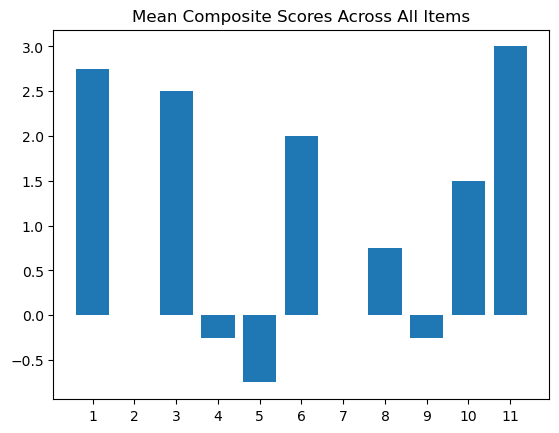

In [32]:
sudsr = np.array(dfuds.iloc[:, :12])
plt.bar(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 'Total'],
        mc(sudsr))
plt.title('Mean Composite Scores Across All Items')

---

## Centrality of Religious Scale - 5

#### Coding freq based on [Huber and Huber (2012)](https://www.mdpi.com/2077-1444/3/3/710)

### Original Scoring

In [33]:
dfcrs = dforig.iloc[:, 25:30]
dfcrs

,How often do you think about religious issues? [How often do you think about religious issues?],To what extent do you believe that God or something divine exists? [To what extent do you believe that God or something divine exists?],How often do you take part in religious services? [How often do you take part in religious services?],How often do you pray? [How often do you pray?],How often do you experience situations in which you have the feeling that God or something divine intervenes in your life? [How often do you experience situations in which you have the feeling that God or something divine intervenes in your life?]
0,3 (Occasionally),2 (Not very much),2 (Rarely),1 (Never),2 (Rarely)
1,4 (Often),2 (Not very much),3 (Occasionally),2 (Rarely),2 (Rarely)
2,2 (Rarely),4 (Quite a bit),3 (Occasionally),3 (Occasionally),3 (Occasionally)
3,1 (Never),1 (Not at all),2 (Rarely),2 (Rarely),2 (Rarely)


### Mapped and Named

In [34]:
dfcrs.rename(columns = {
                        dfcrs.columns[0]: 'Intellect', 
                        dfcrs.columns[1]: 'Ideology', 
                        dfcrs.columns[2]: 'Public Practice', 
                        dfcrs.columns[3]: 'Private Practice', 
                        dfcrs.columns[4]: 'Experience'},
             inplace = True)

scoring = {**dict.fromkeys(['1 (Never)', '1 (Not at all)'], 1), 
           **dict.fromkeys(['2 (Rarely)', '2 (Not very much)'], 2), 
           **dict.fromkeys(['3 (Occasionally)', '3 (Moderately)'], 3),
           **dict.fromkeys(['4 (Often)', '4 (Quite a bit)'], 4),
           **dict.fromkeys(['5 (Very Often)', '5 (Very much so)'], 5)
          }

dfcrs.replace(scoring, inplace = True)
dfcrs

,Intellect,Ideology,Public Practice,Private Practice,Experience
0,3,2,2,1,2
1,4,2,3,2,2
2,2,4,3,3,3
3,1,1,2,2,2


### Descriptive Stats 

In [35]:
crsd = np.array(dfcrs)
dfcrs['Religious Score(M)'] = mr(crsd)
crsd = np.array(dfcrs)

stacked = np.stack((sc(crsd), mc(crsd)))
sum_mean = pd.DataFrame(stacked, index = ['Sum', 'Mean'], columns = dfcrs.columns)

In [36]:
def rel(df):
    if df < 2.1:
        return "Not-religious"
    elif df > 2.0 and df < 4.0:
        return "Religious"
    elif df > 3.9:
        return "Highly Religious"

dfcrs['Religiosity'] = dfcrs['Religious Score(M)'].apply(rel)
dfcrs

,Intellect,Ideology,Public Practice,Private Practice,Experience,Religious Score(M),Religiosity
0,3,2,2,1,2,2.0,Not-religious
1,4,2,3,2,2,2.6,Religious
2,2,4,3,3,3,3.0,Religious
3,1,1,2,2,2,1.6,Not-religious


In [37]:
sum_mean
x = np.array(dfcrs['Religious Score(M)'])
print(f'Standard Deviation of Religious Score: {sdwa(np.array(x))}')

,Intellect,Ideology,Public Practice,Private Practice,Experience,Religious Score(M)
Sum,10.0,9.00,10.0,8.0,9.00,9.2
Mean,2.5,2.25,2.5,2.0,2.25,2.3


Standard Deviation of Religious Score: 0.539


<AxesSubplot:title={'center':'Mean Scores'}, ylabel='Score'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intellect'),
  Text(1, 0, 'Ideology'),
  Text(2, 0, 'Public Practice'),
  Text(3, 0, 'Private Practice'),
  Text(4, 0, 'Experience'),
  Text(5, 0, 'Religious Score(M)')])

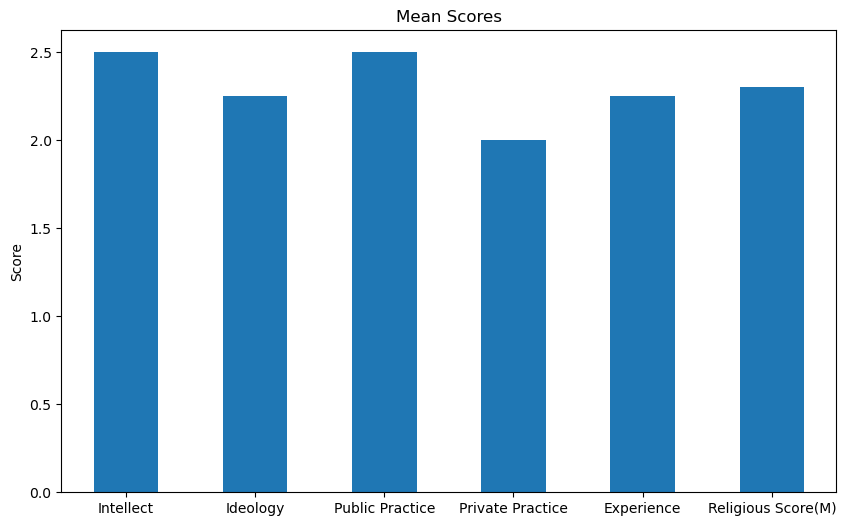

In [38]:
sum_mean.iloc[1, :].plot(kind = 'bar', title='Mean Scores', ylabel='Score', figsize=(10, 6))
plt.xticks(rotation=0)

<AxesSubplot:title={'center':'Religiosity Frequency'}, ylabel='Frequency'>

(array([0, 1]), [Text(0, 0, 'Not-religious'), Text(1, 0, 'Religious')])

Not-religious    2
Religious        2
Name: Religiosity, dtype: int64

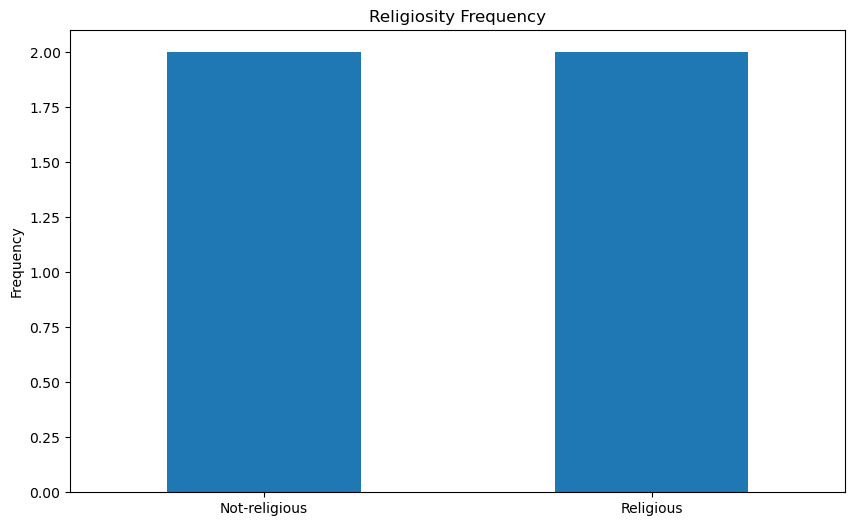

In [39]:
dfcrs['Religiosity'].value_counts().plot(kind = 'bar', title='Religiosity Frequency', ylabel='Frequency', figsize=(10, 6))
plt.xticks(rotation=0)

dfcrs['Religiosity'].value_counts()

---

## Intolerance of Uncertainty Scale - Short Version

### Original Scores

In [40]:
dfius = dforig.iloc[:, 30:42]
dfius

,Please choose the number that best corresponds to how much you agree with each point. [Unforeseen events upset me greatly.],Please choose the number that best corresponds to how much you agree with each point. [It frustrates me not having all the information I need.],Please choose the number that best corresponds to how much you agree with each point. [One should always look ahead so as to avoid surprises.],"Please choose the number that best corresponds to how much you agree with each point. [A small, unforeseen event can spoil everything, even with the best of planning.]",Please choose the number that best corresponds to how much you agree with each point. [I always want to know what the future has in store for me.],Please choose the number that best corresponds to how much you agree with each point. [I can’t stand being taken by surprise.],Please choose the number that best corresponds to how much you agree with each point. [I should be able to organize everything in advance],Please choose the number that best corresponds to how much you agree with each point. [Uncertainty keeps me from living a full life.],"Please choose the number that best corresponds to how much you agree with each point. [When it’s time to act, uncertainty paralyzes me.]",Please choose the number that best corresponds to how much you agree with each point. [When I am uncertain I can’t function very well.],Please choose the number that best corresponds to how much you agree with each point. [The smallest doubt can stop me from acting.],Please choose the number that best corresponds to how much you agree with each point. [I must get away from all uncertain situations.]
0,3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),4,2,3 (Somewhat characteristic of me),2,4,3 (Somewhat characteristic of me),4,4,2,2
1,2,5 (Entirely characteristic of me),3 (Somewhat characteristic of me),2,3 (Somewhat characteristic of me),2,3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),2,2,2,2
2,3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),4,3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),2,3 (Somewhat characteristic of me),4,3 (Somewhat characteristic of me),2
3,3 (Somewhat characteristic of me),4,4,4,4,3 (Somewhat characteristic of me),4,4,3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),3 (Somewhat characteristic of me)


### Mapped and Inted

In [41]:
dius = {
        '3 (Somewhat characteristic of me)': 3,
        '5 (Entirely characteristic of me)': 5,
        '1 (Not at all characteristic of me)': 1
       }

dfius.replace(dius, inplace=True)
dfius = dfius.astype('int64')
dfius

,Please choose the number that best corresponds to how much you agree with each point. [Unforeseen events upset me greatly.],Please choose the number that best corresponds to how much you agree with each point. [It frustrates me not having all the information I need.],Please choose the number that best corresponds to how much you agree with each point. [One should always look ahead so as to avoid surprises.],"Please choose the number that best corresponds to how much you agree with each point. [A small, unforeseen event can spoil everything, even with the best of planning.]",Please choose the number that best corresponds to how much you agree with each point. [I always want to know what the future has in store for me.],Please choose the number that best corresponds to how much you agree with each point. [I can’t stand being taken by surprise.],Please choose the number that best corresponds to how much you agree with each point. [I should be able to organize everything in advance],Please choose the number that best corresponds to how much you agree with each point. [Uncertainty keeps me from living a full life.],"Please choose the number that best corresponds to how much you agree with each point. [When it’s time to act, uncertainty paralyzes me.]",Please choose the number that best corresponds to how much you agree with each point. [When I am uncertain I can’t function very well.],Please choose the number that best corresponds to how much you agree with each point. [The smallest doubt can stop me from acting.],Please choose the number that best corresponds to how much you agree with each point. [I must get away from all uncertain situations.]
0,3,3,4,2,3,2,4,3,4,4,2,2
1,2,5,3,2,3,2,3,3,2,2,2,2
2,3,3,3,3,4,3,3,2,3,4,3,2
3,3,4,4,4,4,3,4,4,3,3,3,3


### Descriptive Stats

In [42]:
ius_arr = np.array(dfius.iloc[:, :12])
prox_anx_arr = np.array(dfius.iloc[:, :7])
inhib_anx_arr = np.array(dfius.iloc[:, 7:12])

stk = np.stack((sr(prox_anx_arr), sr(inhib_anx_arr), sr(ius_arr)), axis=1)

stacked = pd.DataFrame(stk, columns=['Sum Prospec Anx', 'Sum Inhib Anx', 'Total IUS'])
dfius = pd.concat([dfius, stacked], axis=1)

dfius

,Please choose the number that best corresponds to how much you agree with each point. [Unforeseen events upset me greatly.],Please choose the number that best corresponds to how much you agree with each point. [It frustrates me not having all the information I need.],Please choose the number that best corresponds to how much you agree with each point. [One should always look ahead so as to avoid surprises.],"Please choose the number that best corresponds to how much you agree with each point. [A small, unforeseen event can spoil everything, even with the best of planning.]",Please choose the number that best corresponds to how much you agree with each point. [I always want to know what the future has in store for me.],Please choose the number that best corresponds to how much you agree with each point. [I can’t stand being taken by surprise.],Please choose the number that best corresponds to how much you agree with each point. [I should be able to organize everything in advance],Please choose the number that best corresponds to how much you agree with each point. [Uncertainty keeps me from living a full life.],"Please choose the number that best corresponds to how much you agree with each point. [When it’s time to act, uncertainty paralyzes me.]",Please choose the number that best corresponds to how much you agree with each point. [When I am uncertain I can’t function very well.],Please choose the number that best corresponds to how much you agree with each point. [The smallest doubt can stop me from acting.],Please choose the number that best corresponds to how much you agree with each point. [I must get away from all uncertain situations.],Sum Prospec Anx,Sum Inhib Anx,Total IUS
0,3,3,4,2,3,2,4,3,4,4,2,2,21,15,36
1,2,5,3,2,3,2,3,3,2,2,2,2,20,11,31
2,3,3,3,3,4,3,3,2,3,4,3,2,22,14,36
3,3,4,4,4,4,3,4,4,3,3,3,3,26,16,42


In [43]:
tiusarr = np.array(dfius.iloc[:, 12:15])

print(f'IUS Composite Sum: {swa(tiusarr[:, 2])} | Prospective Anxiety Sum: {swa(tiusarr[:, 0])} | Inhibitory Anxiety Sum: {swa(tiusarr[:, 1])}')
print(f'IUS Composite Mean: {mwa(tiusarr[:, 2])} | Prospective Anxiety Mean: {mwa(tiusarr[:, 0])} | Inhibitory Anxiety Mean: {mwa(tiusarr[:, 1])}')
print(f'IUS SD Across Participants: {sdwa(tiusarr[:, 2])} | Prospective Anxiety SD: {sdwa(tiusarr[:, 0])} | Inhibitory Anxiety SD: {sdwa(tiusarr[:, 1])}')

IUS Composite Sum: 145 | Prospective Anxiety Sum: 89 | Inhibitory Anxiety Sum: 56
IUS Composite Mean: 36.25 | Prospective Anxiety Mean: 22.25 | Inhibitory Anxiety Mean: 14.0
IUS SD Across Participants: 3.897 | Prospective Anxiety SD: 2.278 | Inhibitory Anxiety SD: 1.871


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Composite Scores')

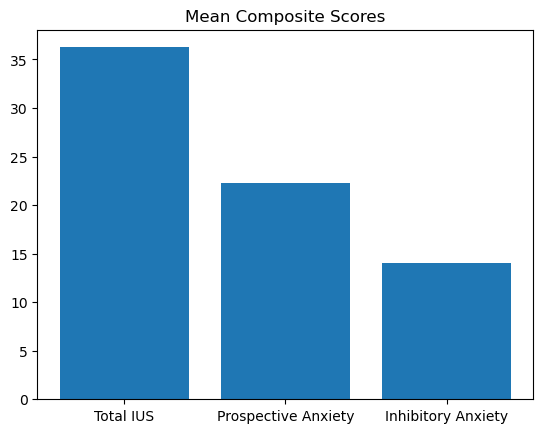

In [44]:
plt.bar(['Total IUS', 'Prospective Anxiety', 'Inhibitory Anxiety'], [mwa(tiusarr[:, 2]), mwa(tiusarr[:, 0]), mwa(tiusarr[:, 1])])
plt.title('Mean Composite Scores')

---

## Social and Economic Conservatism Scale

### Original Scale

In [45]:
dfsec = dforig.iloc[:, 42:54]
dfsec

,"Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Abortion.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Limited government.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Military and national security.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Religion.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Welfare benefits.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Gun ownership.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Traditional marriage.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Traditional values.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Fiscal responsibility.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Business.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [The family unit.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Patriotism.]"
0,100 (Positive),50 (Neutral),50 (Neutral),0 (Negative),100 (Positive),0 (Negative),50 (Neutral),0 (Negative),100 (Positive),50 (Neutral),0 (Negative),50 (Neutral)
1,100 (Positive),50 (Neutral),50 (Neutral),0 (Negative),100 (Positive),0 (Negative),50 (Neutral),50 (Neutral),100 (Positive),50 (Neutral),50 (Neutral),50 (Neutral)
2,0 (Negative),50 (Neutral),50 (Neutral),100 (Positive),100 (Positive),0 (Negative),0 (Negative),0 (Negative),50 (Neutral),50 (Neutral),50 (Neutral),0 (Negative)
3,100 (Positive),50 (Neutral),0 (Negative),0 (Negative),100 (Positive),0 (Negative),0 (Negative),0 (Negative),50 (Neutral),50 (Neutral),0 (Negative),0 (Negative)


### Mapped, Inted and Reversed

In [46]:
map = {'100 (Positive)': 100,
       '50 (Neutral)': 50,
       '0 (Negative)': 0
      }

dfsec.replace(map, inplace=True)
dfsec = dfsec.astype('int64')

dfsec.iloc[:, [0, 4]] = 100 - dfsec.iloc[:, [0, 4]]

dfsec

,"Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Abortion.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Limited government.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Military and national security.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Religion.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Welfare benefits.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Gun ownership.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Traditional marriage.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Traditional values.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Fiscal responsibility.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Business.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [The family unit.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Patriotism.]"
0,0,50,50,0,0,0,50,0,100,50,0,50
1,0,50,50,0,0,0,50,50,100,50,50,50
2,100,50,50,100,0,0,0,0,50,50,50,0
3,0,50,0,0,0,0,0,0,50,50,0,0


### Descriptive Statistics

In [47]:
secs_arr = np.array(dfsec.iloc[:, :12])
ssecs = secs_arr[:, [0, 10, 3, 6, 7, 11, 2]]
esecs = secs_arr[:, [1, 4, 5, 8, 9]]

sum_stack = np.stack((sr(ssecs), sr(esecs), sr(secs_arr)), axis=1)
mean_stack = np.stack((mr(ssecs), mr(esecs), mr(secs_arr)), axis=1)

scsecs = pd.concat([pd.DataFrame(sum_stack, columns=['Sum Social Con', 'Sum Eco Con', 'Sum SECS']), 
                    pd.DataFrame(mean_stack, columns=['Mean Social Con', 'Mean Eco Con', 'Mean SECS'])],
                    axis=1)

scsecs

,Sum Social Con,Sum Eco Con,Sum SECS,Mean Social Con,Mean Eco Con,Mean SECS
0,150,200,350,21.429,40.0,29.167
1,250,200,450,35.714,40.0,37.500
2,300,150,450,42.857,30.0,37.500
3,0,150,150,0.000,30.0,12.500


In [48]:
n = '\n'
print(f'Standard Deviation In Order of Table: {n}{sdwa(sum_stack[:, 0])} | {sdwa(sum_stack[:, 1])} | {sdwa(sum_stack[:, 2])}{n}{sdwa(mean_stack[:, 0])} | {sdwa(mean_stack[:, 1])} | {sdwa(mean_stack[:, 2])}')

Standard Deviation In Order of Table: 
114.564 | 25.0 | 122.474
16.366 | 5.0 | 10.206


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Composite Scores')

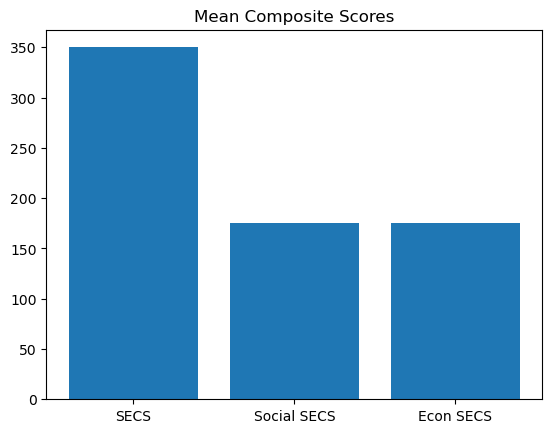

In [49]:
plt.bar(['SECS', 'Social SECS', 'Econ SECS'], [mwa(sum_stack[:, 2]), mwa(sum_stack[:, 1]), mwa(sum_stack[:, 0])])
plt.title('Mean Composite Scores')

---

## Right Wing Authoritarianism 3-Dimensional Scale

### Original Scale

In [51]:
dfrwa = dforig.iloc[:, 54:66]
dfrwa

,"People should develop their own personal standards about good and evil and pay less attention to the Bible and other old, traditional forms of religious guidance.",What our country really needs instead of more “civil rights” is a good stiff dose of law and order.,The days when women are submissive should belong strictly in the past. A “woman’s place” in society should be wherever she wants to be.,The withdrawal from tradition will turn out to be a fatal fault one day.,There is no such crime to justify capital punishment.,Obedience and respect for authority are the most important values children should learn.,Homosexual long-term relationships should be treated as equivalent to marriage.,"What our country really needs is a strong, determined Chancellor which will crush the evil and set us on our right way again.",It is good that nowadays young people have greater freedom “to make their own rules” and to protest against things they don’t like.,Being virtuous and law-abiding is in the long run better for us than permanently challenging the foundation of our society.,It is important to protect the rights of radicals and deviants in all ways.,"The real keys to the “good life” are obedience, discipline, and virtue."
0,7,1,7,1,6,1,7,1,6,1,4,1
1,7,2,7,3,3,3,7,6,6,4,4,2
2,4,4,1,2,4,4,4,2,4,4,4,4
3,7,2,7,2,7,2,7,2,7,3,6,2


### Reversed

In [52]:
dfrwa.iloc[:, [4, 10, 2, 8, 0, 6]] = 8 - dfrwa.iloc[:, [4, 10, 2, 8, 0, 6]]
dfrwa

,"People should develop their own personal standards about good and evil and pay less attention to the Bible and other old, traditional forms of religious guidance.",What our country really needs instead of more “civil rights” is a good stiff dose of law and order.,The days when women are submissive should belong strictly in the past. A “woman’s place” in society should be wherever she wants to be.,The withdrawal from tradition will turn out to be a fatal fault one day.,There is no such crime to justify capital punishment.,Obedience and respect for authority are the most important values children should learn.,Homosexual long-term relationships should be treated as equivalent to marriage.,"What our country really needs is a strong, determined Chancellor which will crush the evil and set us on our right way again.",It is good that nowadays young people have greater freedom “to make their own rules” and to protest against things they don’t like.,Being virtuous and law-abiding is in the long run better for us than permanently challenging the foundation of our society.,It is important to protect the rights of radicals and deviants in all ways.,"The real keys to the “good life” are obedience, discipline, and virtue."
0,1,1,1,1,2,1,1,1,2,1,4,1
1,1,2,1,3,5,3,1,6,2,4,4,2
2,4,4,7,2,4,4,4,2,4,4,4,4
3,1,2,1,2,1,2,1,2,1,3,2,2


### Descriptive Statistics

In [53]:
rwa_array = np.array(dfrwa)
agg = rwa_array[:, [1, 7, 4, 10]]
sub = rwa_array[:, [5, 11, 2, 8]]
conv = rwa_array[:, [3, 9, 0, 6]]

sum_stack = np.stack([sr(agg), sr(sub), sr(conv), sr(rwa_array)], axis=1)
mean_stack = np.stack([mr(agg), mr(sub), mr(conv), mr(rwa_array)], axis=1)

res = pd.concat([pd.DataFrame(sum_stack, columns=['Aggression Sum', 'Submission Sum', 'Conventionalism Sum', 'RWA Sum']),
                 pd.DataFrame(mean_stack, columns=['Aggression Mean', 'Submission Mean', 'Conventionalism Mean', 'RWA Mean'])],
                 axis=1)
res

,Aggression Sum,Submission Sum,Conventionalism Sum,RWA Sum,Aggression Mean,Submission Mean,Conventionalism Mean,RWA Mean
0,8,5,4,17,2.00,1.25,1.00,1.417
1,17,8,9,34,4.25,2.00,2.25,2.833
2,14,19,14,47,3.50,4.75,3.50,3.917
3,7,6,7,20,1.75,1.50,1.75,1.667


<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Mean Across All Participants')

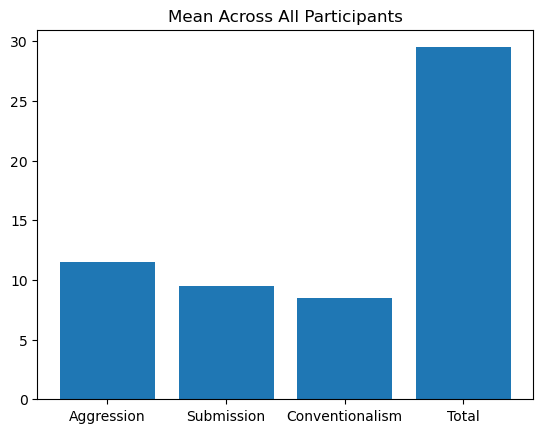

In [54]:
plt.bar(['Aggression', 'Submission', 'Conventionalism', 'Total'], [mwa(sum_stack[:, 0]), mwa(sum_stack[:, 1]), mwa(sum_stack[:, 2]), mwa(sum_stack[:, 3])])
plt.title('Mean Across All Participants')

---

## Social Dominance Orientation Scale

### Original Scale

In [55]:
dfsdo = dforig.iloc[:, 66:74]
dfsdo

,Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [An ideal society requires some groups to be on top and others to be on the bottom.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Some groups of people are simply inferior to other groups.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [No one group should dominate in society.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Groups at the bottom are just as deserving as groups at the top.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Group equality should not be our primary goal.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [It is unjust to try to make groups equal.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [We should do what we can to equalize conditions for different groups.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [We should work to give all groups an equal chance to succeed.]
0,1 (Strongly Oppose),1 (Strongly Oppose),7 (Strongly Favour),7 (Strongly Favour),7 (Strongly Favour),1 (Strongly Oppose),7 (Strongly Favour),7 (Strongly Favour)
1,2 (Somewhat Oppose),2 (Somewhat Oppose),7 (Strongly Favour),6 (Somewhat Favour),1 (Strongly Oppose),1 (Strongly Oppose),7 (Strongly Favour),7 (Strongly Favour)
2,4 (Neutral),4 (Neutral),6 (Somewhat Favour),4 (Neutral),2 (Somewhat Oppose),3 (Slightly Oppose),4 (Neutral),5 (Slightly Favour)
3,1 (Strongly Oppose),1 (Strongly Oppose),7 (Strongly Favour),7 (Strongly Favour),2 (Somewhat Oppose),1 (Strongly Oppose),6 (Somewhat Favour),7 (Strongly Favour)


### Mapped and Reversed

In [56]:
map = {'1 (Strongly Oppose)': 1,
       '2 (Somewhat Oppose)': 2,
       '3 (Slightly Oppose)': 3,
       '4 (Neutral)': 4,
       '5 (Slightly Favour)': 5,
       '6 (Somewhat Favour)': 6,
       '7 (Strongly Favour)': 7
      }

dfsdo.replace(map, inplace=True)

dfsdo.iloc[:, [2, 3, 6, 7]] = 8 - dfsdo.iloc[:, [2, 3, 6, 7]]

dfsdo

,Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [An ideal society requires some groups to be on top and others to be on the bottom.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Some groups of people are simply inferior to other groups.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [No one group should dominate in society.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Groups at the bottom are just as deserving as groups at the top.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Group equality should not be our primary goal.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [It is unjust to try to make groups equal.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [We should do what we can to equalize conditions for different groups.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [We should work to give all groups an equal chance to succeed.]
0,1,1,1,1,7,1,1,1
1,2,2,1,2,1,1,1,1
2,4,4,2,4,2,3,4,3
3,1,1,1,1,2,1,2,1


### Descriptive Statistics

In [57]:
sdo_array = np.array(dfsdo)
sdod = sdo_array[:, :4]
sdoe = sdo_array[:, 4:]

mean_stk = np.stack([mr(sdod), mr(sdoe), mr(sdo_array)], axis=1)
sum_stk = np.stack([sr(sdod), sr(sdoe), sr(sdo_array)], axis=1)

mean_sdo = pd.concat([(pd.DataFrame(sum_stk, columns=['Sum SDO-D', 'Sum SDO-E', 'Sum SDO'])), 
                      (pd.DataFrame(mean_stk, columns=['Mean SDO-D', 'Mean SDO-E', 'Mean SDO']))],
                     axis=1)
mean_sdo

,Sum SDO-D,Sum SDO-E,Sum SDO,Mean SDO-D,Mean SDO-E,Mean SDO
0,4,10,14,1.00,2.5,1.750
1,7,4,11,1.75,1.0,1.375
2,14,12,26,3.50,3.0,3.250
3,4,6,10,1.00,1.5,1.250


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Composite Scores')

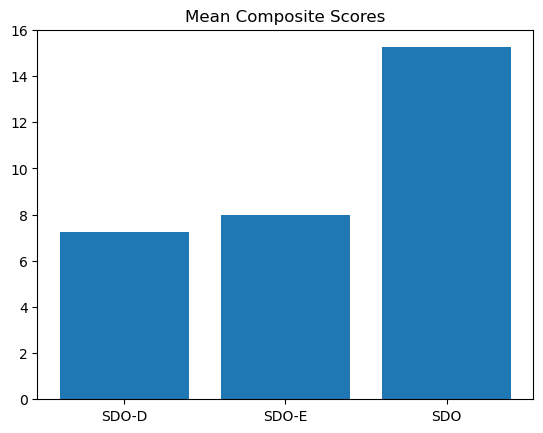

In [58]:
plt.bar(['SDO-D', 'SDO-E', 'SDO'], [mwa(sum_stk[:, 0]), mwa(sum_stk[:, 1]), mwa(sum_stk[:, 2])])
plt.title('Mean Composite Scores')

---

## Behavioural Inhibition System/Behavioural Activation System Scale

### Original Scale

In [59]:
dfsdo = dforig.iloc[:, 74:94]
dfsdo

,"Even if something bad is about to happen to me, I rarely experience fear or nervousness.",I go out of my way to get things I want.,"When I'm doing well at something, I love to keep at it.",I'm always willing to try something new if I think it will be fun.,"When I get something I want, I feel excited and energized.",Criticism or scolding hurts me quite a bit.,"When I want something, I usually go all-out to get it.",I will often do things for no other reason than that they might be fun.,"If I see a chance to get something I want, I move on it right away.",I feel pretty worried or upset when I think or know somebody is angry at me.,"When I see an opportunity for something I like, I get excited right away.",I often act on the spur of the moment.,"If I think something unpleasant is going to happen, I usually get pretty ""worked up.""","When good things happen to me, it affects me strongly.",I feel worried when I think I have done poorly at something.,I crave excitement and new sensations.,"When I go after something, I use a ""no holds barred"" approach.",I have very few fears compared to my friends.,It would excite me to win a contest.,I worry about making mistakes.
0,2,3,4,3,4,4,4,3,4,4,4,3,3,3,4,3,1,2,4,4
1,1,2,3,3,4,3,3,3,3,3,3,2,3,3,3,3,2,2,3,3
2,1,3,4,4,4,2,3,4,3,3,4,3,1,4,1,4,2,3,4,4
3,2,3,3,3,3,3,2,3,2,3,3,2,3,3,3,3,2,2,3,4


### Inted and Reversed

In [60]:
map = {'1 = Very true for me': 1,
       '2 = Somewhat true for me': 2,
       '3 = Somewhat false for me': 3,
       '4 = Very false for me': 4}

dfsdo.replace(map, inplace=True)

keep = [col for col in range(dfsdo.shape[1]) if col not in [0, 17]]
dfsdo.iloc[:, keep] = 5 - dfsdo.iloc[:, keep]

dfsdo

,"Even if something bad is about to happen to me, I rarely experience fear or nervousness.",I go out of my way to get things I want.,"When I'm doing well at something, I love to keep at it.",I'm always willing to try something new if I think it will be fun.,"When I get something I want, I feel excited and energized.",Criticism or scolding hurts me quite a bit.,"When I want something, I usually go all-out to get it.",I will often do things for no other reason than that they might be fun.,"If I see a chance to get something I want, I move on it right away.",I feel pretty worried or upset when I think or know somebody is angry at me.,"When I see an opportunity for something I like, I get excited right away.",I often act on the spur of the moment.,"If I think something unpleasant is going to happen, I usually get pretty ""worked up.""","When good things happen to me, it affects me strongly.",I feel worried when I think I have done poorly at something.,I crave excitement and new sensations.,"When I go after something, I use a ""no holds barred"" approach.",I have very few fears compared to my friends.,It would excite me to win a contest.,I worry about making mistakes.
0,2,2,1,2,1,1,1,2,1,1,1,2,2,2,1,2,4,2,1,1
1,1,3,2,2,1,2,2,2,2,2,2,3,2,2,2,2,3,2,2,2
2,1,2,1,1,1,3,2,1,2,2,1,2,4,1,4,1,3,3,1,1
3,2,2,2,2,2,2,3,2,3,2,2,3,2,2,2,2,3,2,2,1


### Descriptive Statistics

In [61]:
sdo_array = np.array(dfsdo)

basd = sr(sdo_array[:, [1, 6, 8, 16]])
basf = sr(sdo_array[:, [3, 7, 11, 15]])
basr = sr(sdo_array[:, [2, 4, 10, 13, 18]])
bis = sr(sdo_array[:, [0, 5, 9, 12, 14, 17, 19]])

total = [col for col in range(dfsdo.shape[1]) if col not in [0, 5, 9, 12, 14, 17, 19]]
total = sr(sdo_array[:, total])

subsdo = np.stack((basd, basf, basr, bis, total), axis=1)

pd_subsdo = pd.DataFrame(subsdo, columns=['BAS Drive', 'BAS Fun Seeking', 'BAS Reward Response', 'BIS', 'BAS Index'])

pd_subsdo

,BAS Drive,BAS Fun Seeking,BAS Reward Response,BIS,BAS Index
0,8,8,6,10,22
1,10,9,9,13,28
2,9,5,5,18,19
3,11,9,10,13,30


<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Composite Scores')

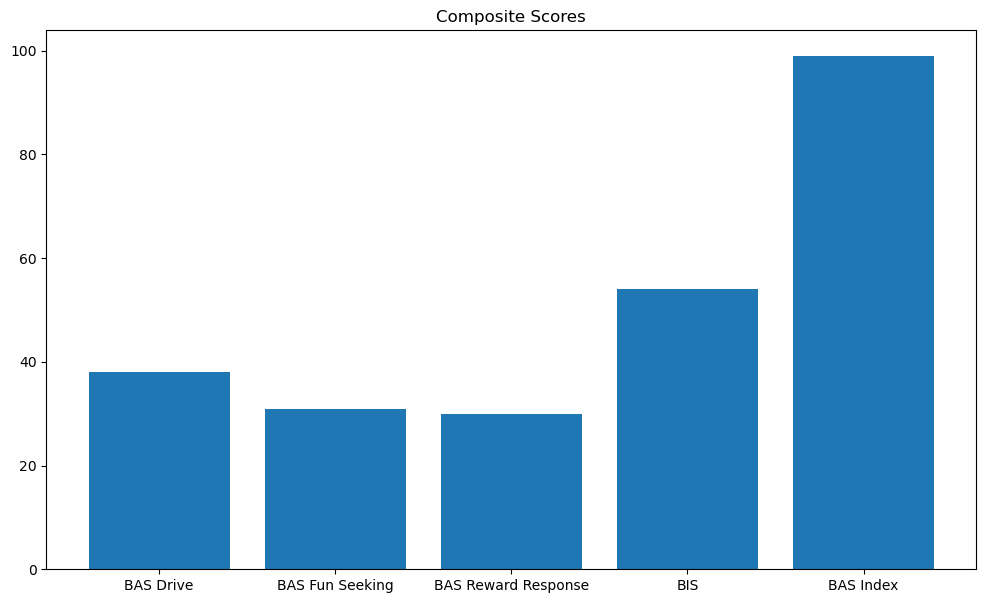

In [62]:
plt.rcParams["figure.figsize"] = (12,7)
plt.bar(['BAS Drive', 'BAS Fun Seeking', 'BAS Reward Response', 'BIS', 'BAS Index'], [swa(basd), swa(basf), swa(basr), swa(bis), swa(total)])
plt.title('Composite Scores')